<a href="https://colab.research.google.com/github/MuhammadMoaviaKhan/Data-Analytics-Projects/blob/main/Netflix_IMDB_Scores_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALYTICS OF NETFLIX IMDB SCORES**

In [ ]:
import pandas as pd
import numpy as np
import io

from google.colab import files
upload = files.upload()

Saving Netflix TV Shows and Movies.csv to Netflix TV Shows and Movies.csv


## READ CSV FILE

In [ ]:
df = pd.read_csv(io.BytesIO(upload['Netflix TV Shows and Movies.csv']))

In [ ]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  5283 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5283 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 412.9+ KB


In [ ]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [ ]:
df['age_certification'].fillna('unknown', inplace= True)

In [ ]:
df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

index                0
id                   0
title                0
type                 0
description          5
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

In [ ]:
df.drop('description', axis= 1, inplace=True)

In [ ]:
df.columns

Index(['index', 'id', 'title', 'type', 'release_year', 'age_certification',
       'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

## DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
stats_of_imdb_scores =  df['imdb_score'].describe()
stats_of_imdb_scores

count    5283.000000
mean        6.533447
std         1.160932
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.600000
Name: imdb_score, dtype: float64

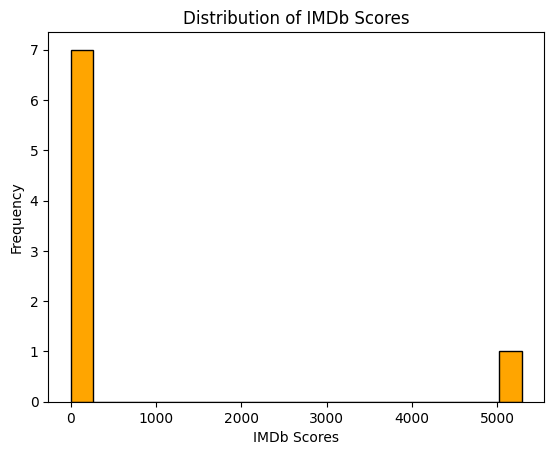

In [ ]:
plt.hist(stats_of_imdb_scores, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Scores')
plt.ylabel('Frequency')
plt.show()

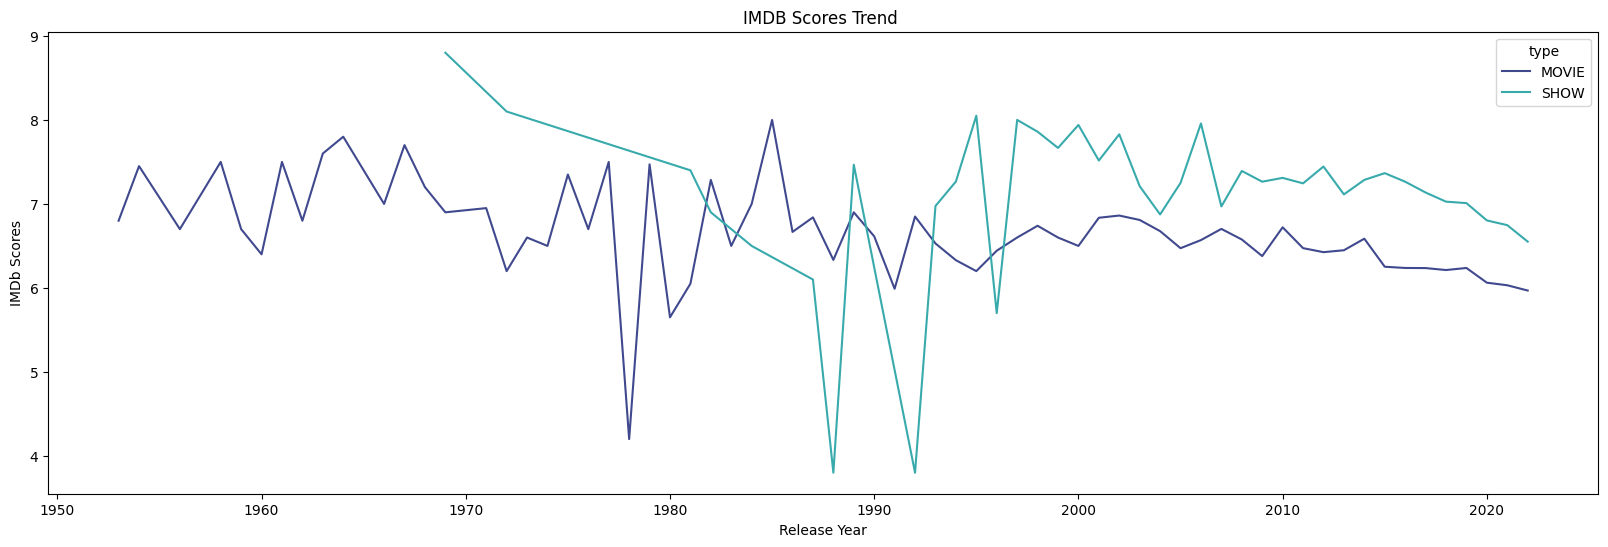

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x= 'release_year', y= 'imdb_score',hue = 'type', data= df,err_style = None,  palette = 'mako')
plt.title('IMDB Scores Trend ')
plt.xlabel('Release Year')
plt.ylabel('IMDb Scores')
plt.show()

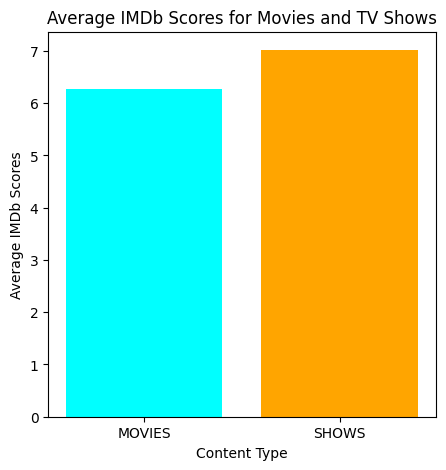

In [ ]:
average_imdb_movies = df[df['type'] == 'MOVIE']['imdb_score'].mean()
average_imdb_tv_shows = df[df['type'] == 'SHOW']['imdb_score'].mean()
# average_imdb_movies
# average_imdb_tv_shows
categories = ['MOVIES', 'SHOWS']
values = [average_imdb_movies, average_imdb_tv_shows]

colour = ['aqua', 'orange']
plt.figure(figsize=(5, 5))
plt.bar(categories, values, color= colour)
plt.xlabel('Content Type')
plt.ylabel('Average IMDb Scores')
plt.title('Average IMDb Scores for Movies and TV Shows')
plt.show()

In [ ]:
ds = df.sort_values(by= ['imdb_score'], ascending=False)
top_20_movie_or_show=  ds.head(20)
top_20_movie_or_show

,index,id,title,type,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
622,622,ts160526,Khawatir,SHOW,2005,TV-14,20,tt3062514,9.6,3046.0
2787,2787,ts265844,#ABtalks,SHOW,2018,TV-PG,68,tt12635254,9.6,7.0
229,229,ts4,Breaking Bad,SHOW,2008,TV-MA,48,tt0903747,9.5,1727694.0
3144,3144,ts85398,Our Planet,SHOW,2019,TV-G,50,tt9253866,9.3,41386.0
3597,3597,ts90621,Kota Factory,SHOW,2019,TV-MA,42,tt9432978,9.3,66985.0
245,245,ts3371,Avatar: The Last Airbender,SHOW,2005,TV-Y7,24,tt0417299,9.3,297336.0
1346,1346,ts37660,Reply 1988,SHOW,2015,TV-14,95,tt5182866,9.2,6557.0
1953,1953,ts78298,My Mister,SHOW,2018,TV-14,79,tt7923710,9.2,5481.0
4628,4628,ts296563,Who Rules The World,SHOW,2022,TV-PG,44,tt14950036,9.2,81.0
3026,3026,ts81120,The Last Dance,SHOW,2020,TV-MA,50,tt8420184,9.1,108321.0


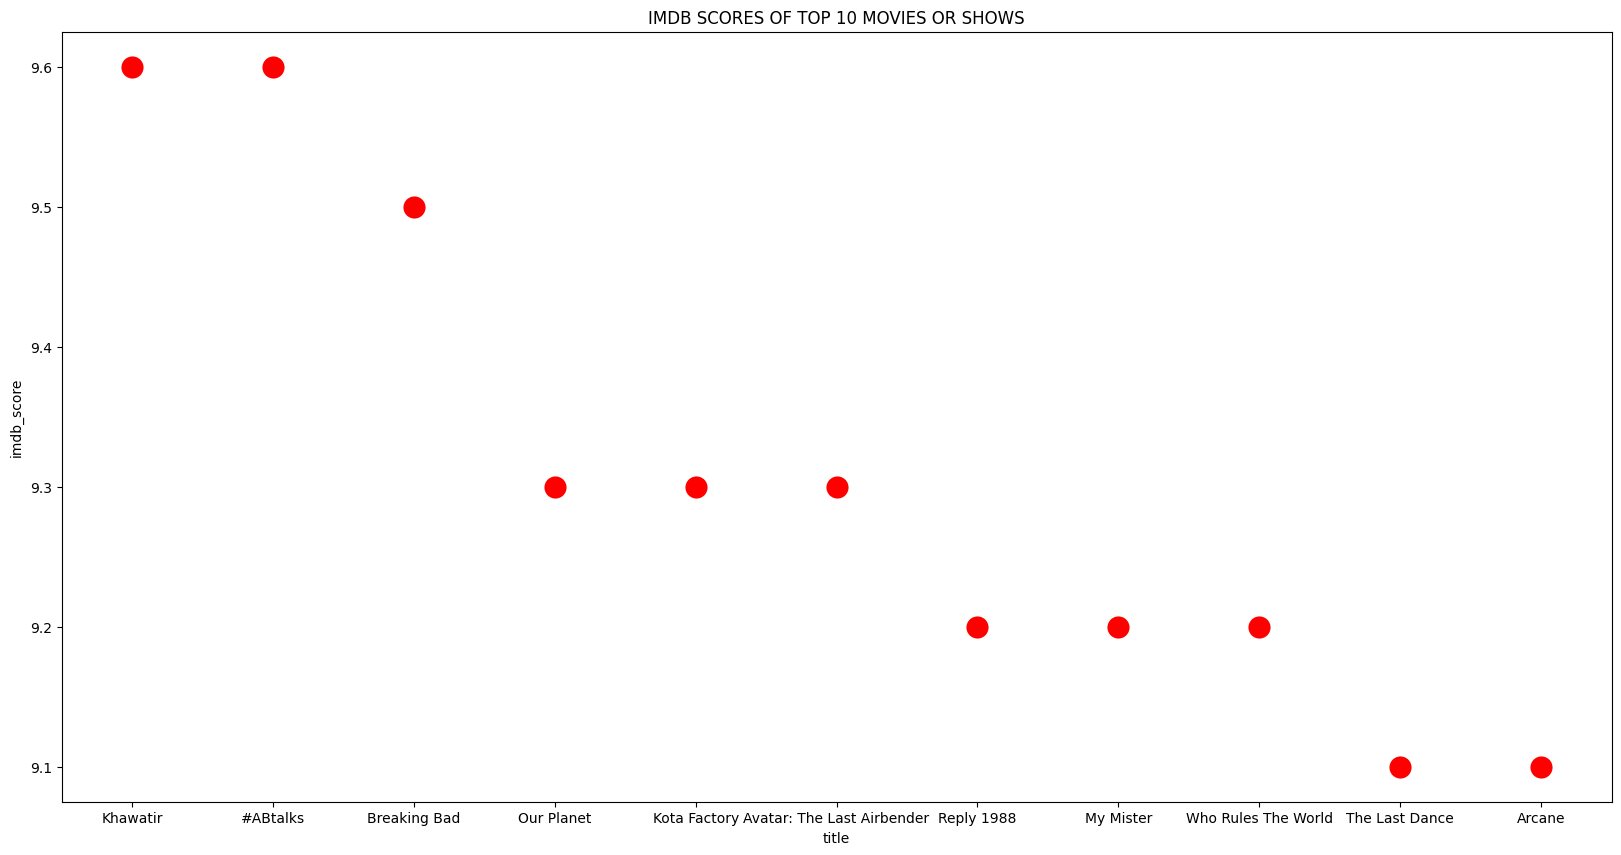

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x= top_20_movie_or_show['title'][:11], y= top_20_movie_or_show['imdb_score'][:11], s= 300,color = 'red')
plt.title('IMDB SCORES OF TOP 10 MOVIES OR SHOWS')
plt.show()

# **SUMMARY**

**IMDB Scores Trend of Netflix Movies are between 6.00 to 7.50 ratings. One-time IMDB Scores Trend of Netflix Movies graph touch a 4.00 rating in the late 70 decade. In the middle of the 80 decade, IMDB Scores Trend of Netflix Movies got the highest rating which is 8.10**

**IMDB Scores Trend of Netflix Shows ratings are between 6.50 to 8.00. In the late 80s and early 90s decade these two times ratings came below 4.00. In the late '60s, Netflix shows performed brilliantly and got more than 8.60 rating on IMDB.**

**The average IMDb Score of Movies is 6.30.**
**The average IMDb Score of shows is 6.90.**

**Top 10 Shows from Netflix is Khawatir(S) Score 9.6, #AB Talks(S) Score 9.6, Breaking Bad(S) Score 9.5, Our Planet(S) Score 9.3, Kota Factory Avatar(S) Score 9.3, The Last Airbender(S) Score 9.3, Reply 1988(S) Score 9.2, My Mister(S) Score 9.2, Who Rules the Worlde(S) Score 9.2, The Last Dance(S) Score 9.1, Arcane(S) Score 9.1**